In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

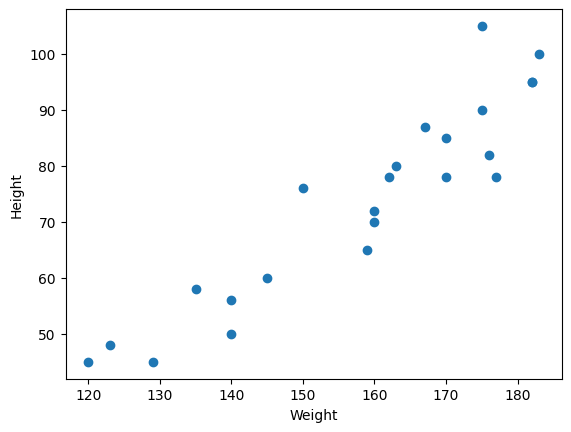

In [5]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [16]:
## divide our dataset into independent and dependent edatures
X = df[['Weight']] # Independent Feature
y = df['Height'] # Dependent Feature
X.shape

(23, 1)

In [17]:
from sklearn.model_selection import train_test_split

# X_train is my independent feature
# y_train is my dependent feature
# X_test and y_test is my testing feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((18, 1), (5, 1), (18,), (5,))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # It gives z score value
X_test = scaler.transform(X_test) 
# It does not recalculate the mean and std from X_test.  it only transforms using the training set's statistics. It also gives z score value.


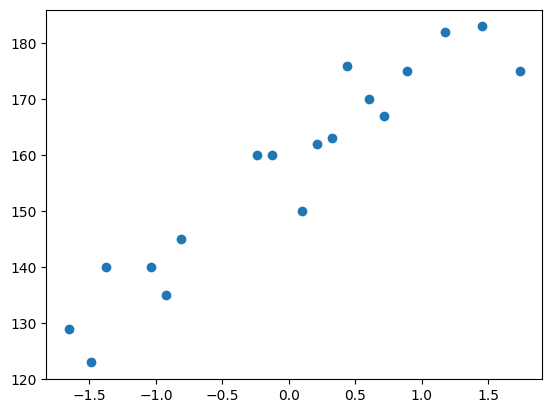

In [23]:
plt.scatter(X_train, y_train)

In [24]:
# Train the simple linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

The slope or coefficient of weight is :  [17.03440872]
Intercept :  157.5


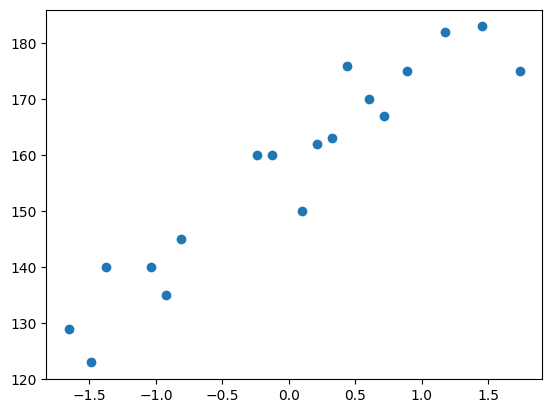

In [31]:
# Here I have only one independent feature weight so that the slope or coefficient is only one.
print("The slope or coefficient of weight is : ", regressor.coef_)
print("Intercept : ", regressor.intercept_)

plt.scatter(X_train, y_train)

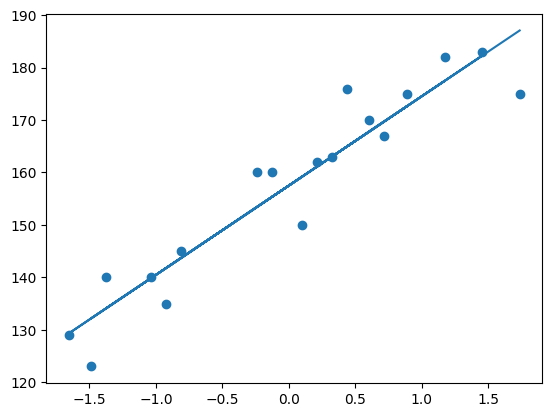

In [35]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train))

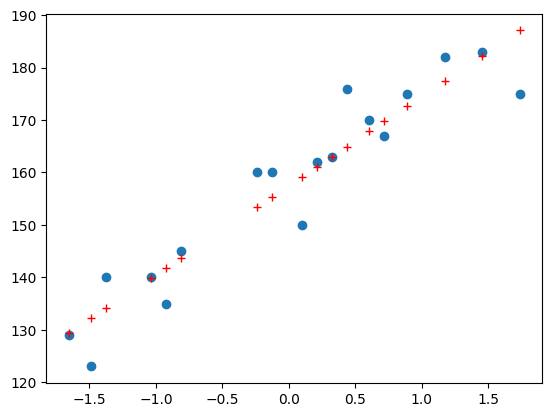

In [38]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r+')

In [40]:
y_pred_test = regressor.predict(X_test)
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

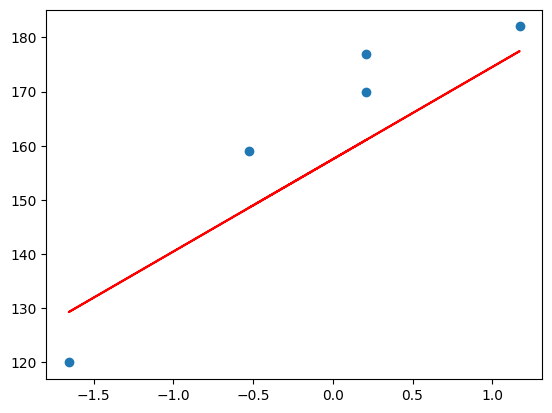

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, adjusted_rand_score
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [48]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [50]:
scaled_weight = scaler.transform([[80]])
scaled_weight

d:\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [53]:
print("The height prediction for weight 80 kg is : ", regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is :  [163.01076266]


In [55]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\jiban\AppData\Local\Temp;\ipykernel_16908\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

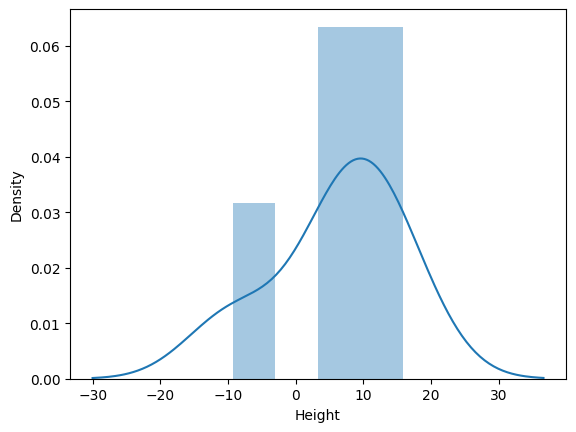

In [57]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

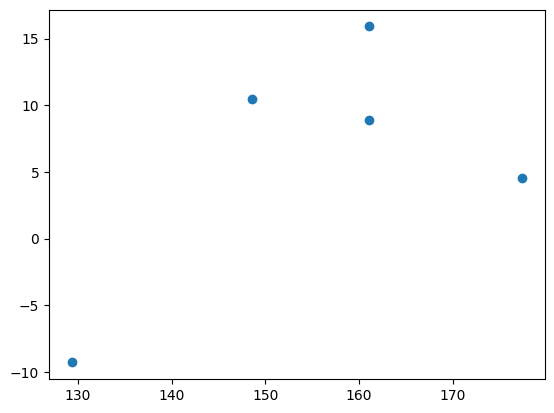

In [58]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)